# Apprentissage supervisé

Le but de ce TP est d'implémenter et tester les algorithmes vues en classes.

## Utilitaire

Ci-dessous des fonctions à utiliser pour le TP.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


def plot_points(points, ax, color):
    """
        Plots points.
        :param points: the points to plot
        :type points: iterable
        :param ax: the axis to plot in
        :type ax: matplotlib.axis
        :param color: the plotted points color
        :type color: str
    """
    ax.scatter(points[:, 0], points[:, 1], c=color)

    
def plot_dataset(X, Y, ax, **parameters):
    """
        Plots the dataset.
        :param X: the points to plot
        :type X: np.array
        :param Y: the points classes
        :type Y: np.array
        :param ax: the axis to plot in
        :type ax: matplotlib.axis
        :param colors: the plotted points colors depending on the class
        :type colors: iterable
    """
    for x, color in zip([X[Y==y] for y in set(Y)], parameters['colors']):
        plot_points(x, ax, color)

        
def mesh_from(X, gap=.2):
    """
        Constructs mesh points from some 2D instances
        :param X: the 2D instances
        :type X: np.array
        :param gap: the gap between two mesh points
        :type gap: float
        :return: the mesh points
        :rtype: tuple
    """
    return np.meshgrid(
        np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, gap),
        np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, gap),
    )


def plot_separator(xx, yy, ax, classifier, **parameters):
    """
        Plots separator.
        
        :param xx: mesh first coordinates
        :type xx: np.array
        :param yy: mesh second coordinates
        :type yy: np.array
        :param ax: subplot to draw in
        :type ax: matplotlib.axis
        :param classifier: the prediction function
        :type classifier: callable
    """
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, **parameters)


On génère trois bases de données pour l'apprentissage:

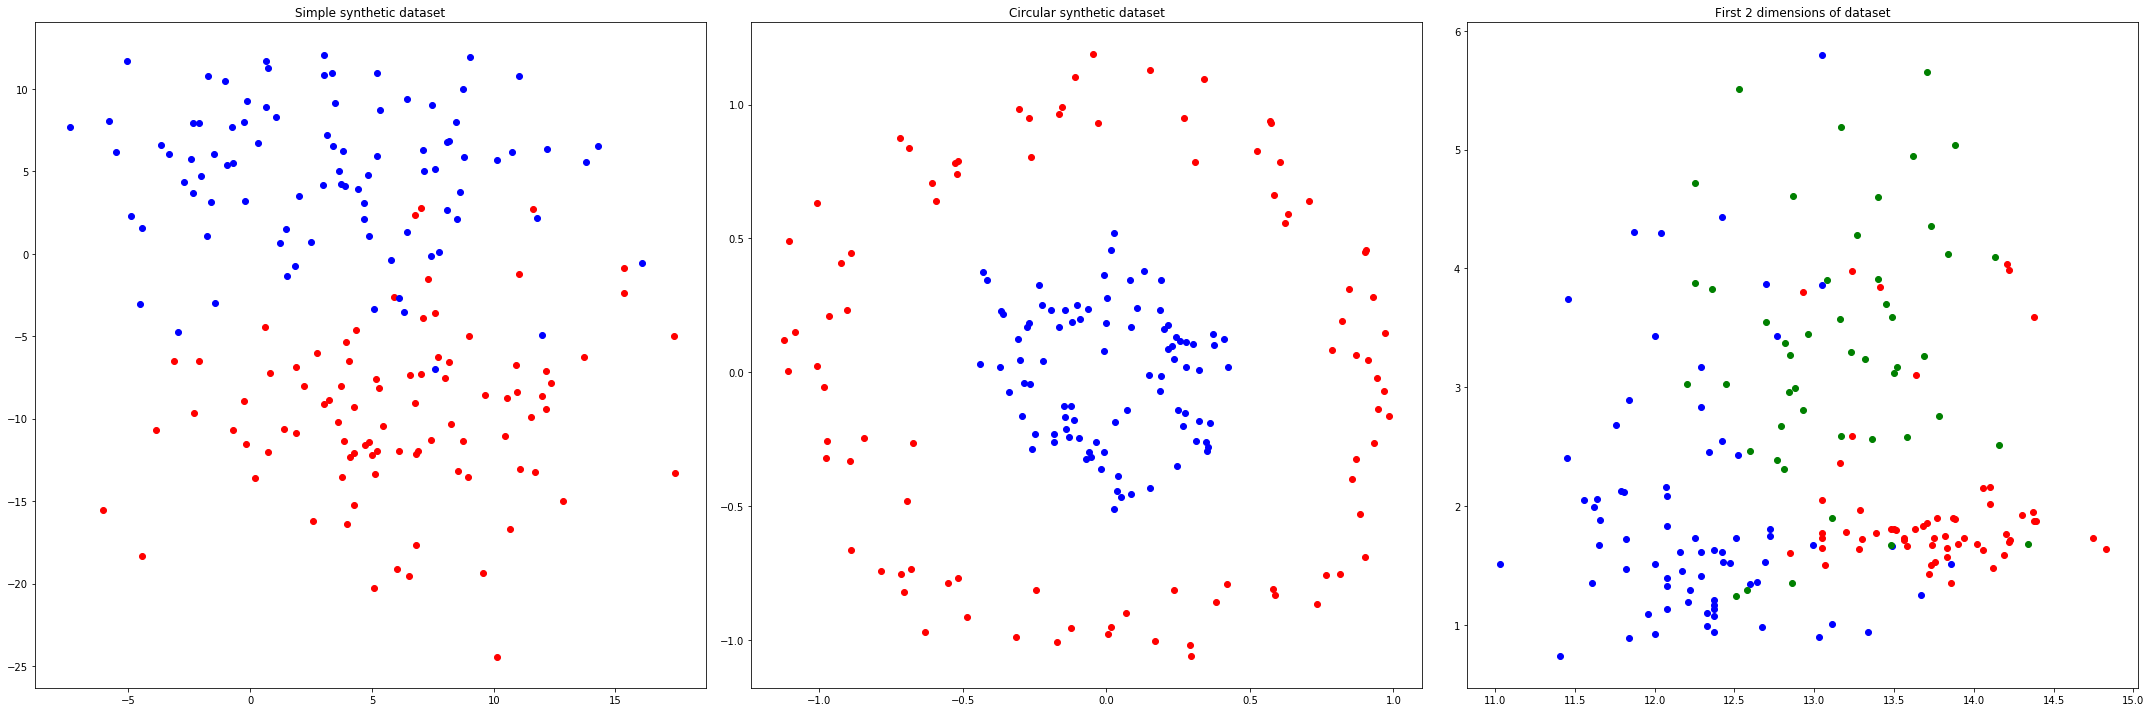

In [9]:
import sklearn.datasets

X_blob, Y_blob = sklearn.datasets.make_blobs(n_samples=178, centers=2, random_state=10, cluster_std=5)
X_circles, Y_circles = sklearn.datasets.make_circles(n_samples=178, factor=.3, noise=.1)
wine_data = sklearn.datasets.load_wine()
X_wine, Y_wine = wine_data.data, wine_data.target
datasets = [('blobs', X_blob, Y_blob), ('circles', X_circles, Y_circles), ('wine', X_wine, Y_wine)]

figure, (ax1, ax2, ax3) = plt.subplots(1, 3)
figure.set_figheight(10)
figure.set_figwidth(30)

plot_dataset(X_blob, Y_blob, ax1, colors=['r', 'b'])
ax1.set_title('Simple synthetic dataset')
plot_dataset(X_circles, Y_circles, ax2, colors=['r', 'b'])
ax2.set_title('Circular synthetic dataset')
plot_dataset(X_wine, Y_wine, ax3, colors=['r', 'b', 'g'])
ax3.set_title('First 2 dimensions of dataset')
plt.tight_layout()
plt.show()


## Classifieur de centroïdes

1.
Implémenter la fonction `centroid_train` qui entraîne un modèle de classifieur de centroïdes.

2.
Implémenter le fonction `centroid_test` qui prédit, pour une instance, la classe la plus probable.

3.
Lancer le code et commenter les résultats.

In [10]:
# Euclidian Norm
euclidian = lambda x, y: np.linalg.norm(np.array(x) - np.array(y))

def centroid_train(X, Y):
    return [
        np.mean()
        # Implement this
        for cls in set(Y)
    ]


def centroid_test(X, centroids, metric=euclidian):
    return 0


figure, axes = plt.subplots(1, 3)
figure.set_figheight(10)
figure.set_figwidth(30)

for (name, X, Y), ax in zip(datasets, axes):
    centroids = centroid_train(X, Y)
    xx, yy = mesh_from(X, .01)
    plot_separator(
        xx,
        yy,
        ax,
        lambda x:  centroid_test(x, centroids),
        cmap=plt.cm.viridis,
        alpha=0.5
    )
    ax.set_title('Centroid classifier applied to' + name)

plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (<ipython-input-10-3c43372aa2c0>, line 7)

## k-NN

